## 6.5 Machine Learning Part 2

1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering

## Importing libraries and data and renaming columns

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [11]:
%matplotlib inline

In [17]:
path = 'C:/Users/olivi/OneDrive/Documents/Data Analytics/Data Analytics Immersion'

In [19]:
df = pd.read_csv(os.path.join(path, 'Boat Sales Analysis' , '02 Data' , 'Prepared Data' , 'boat_data_assignment_4.csv'))

In [24]:
df.shape

(6771, 12)

In [26]:
df.head()

,Unnamed: 0,Currency,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,0,EUR,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
1,1,CHF,3770,Sport Boat,Marine power boats,new boat from stock,2005,3.69,1.42,Aluminium,Switzerland,124
2,2,EUR,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58
3,3,CHF,3650,Sport Boat,Linder power boats,new boat from stock,2005,4.03,1.56,Aluminium,Switzerland,132
4,4,CHF,3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland,239


In [28]:
df.rename(columns = {'Unnamed: 0' : 'Delete'}, inplace = True)

In [104]:
df.columns

Index(['Price', 'Year Built', 'Length', 'Width', 'Number of views last 7 days',
       'clusters', 'cluster'],
      dtype='object')

In [45]:
df_drop = df

In [112]:
df_drop.drop(columns=['clusters' , 'cluster' ,], inplace=True)

In [114]:
df.columns

Index(['Price', 'Year Built', 'Length', 'Width',
       'Number of views last 7 days'],
      dtype='object')

## 2. The elbow technique

In [155]:
num_cl = range(1,10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [157]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3830925319940035.5,
 -1651182578779985.8,
 -938203240067499.9,
 -616682645154072.1,
 -367493929497881.8,
 -240463323702623.47,
 -175870510005308.7,
 -161898956233556.06,
 -119294568269155.0]

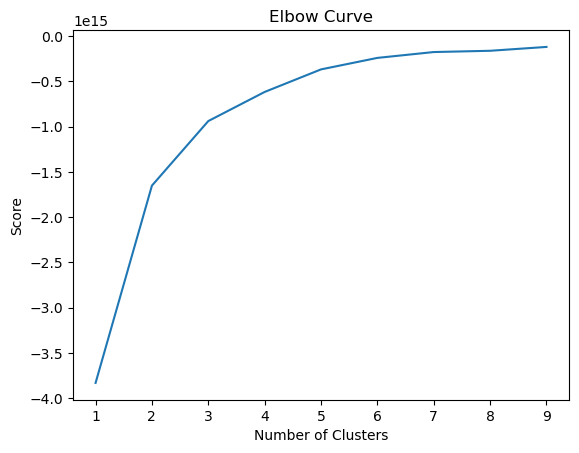

In [158]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this example, there's a large jump from one to three on the x-axis, but after that, the curve straightens out. That means that the optimal count for the clusters is three.

## 3. k-means clustering

In [163]:
# Create the k-means object

kmeans = KMeans(n_clusters = 3)


In [165]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [167]:
df_drop['clusters'] = kmeans.fit_predict(df_drop)

In [169]:
df.head()

,Price,Year Built,Length,Width,Number of views last 7 days,clusters
0,3490,2020,4.00,1.50,75,0
1,3770,2005,3.69,1.42,124,0
2,3399,2019,3.55,1.46,58,0
3,3650,2005,4.03,1.56,132,0
4,3500,1987,4.35,1.75,239,0


In [171]:
df_drop['clusters'].value_counts()

clusters
0    6541
2     211
1      19
Name: count, dtype: int64

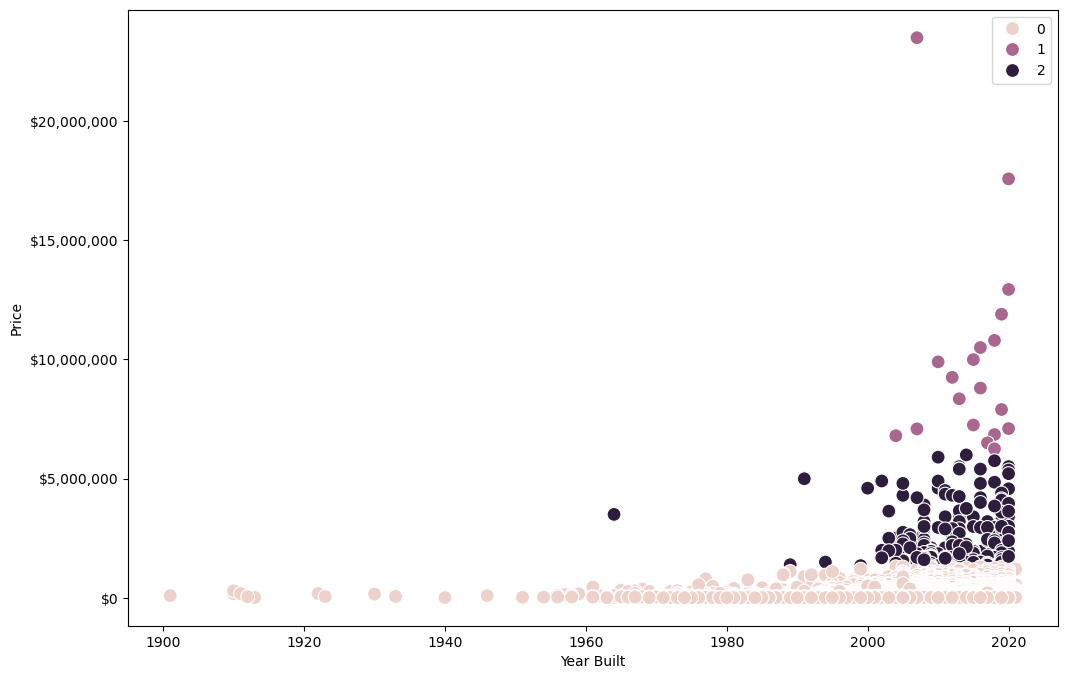

In [181]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year Built'], y=df['Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
# Format the y-axis to show currency
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year Built') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

This graph illustrates that the year built varies widely in the lower price ranges, indicating that boats from a range of years are available at more budget-friendly prices. In contrast, as prices increase into the luxury range, the boats sold tend to be newer, with this trend becoming more pronounced at higher price points.

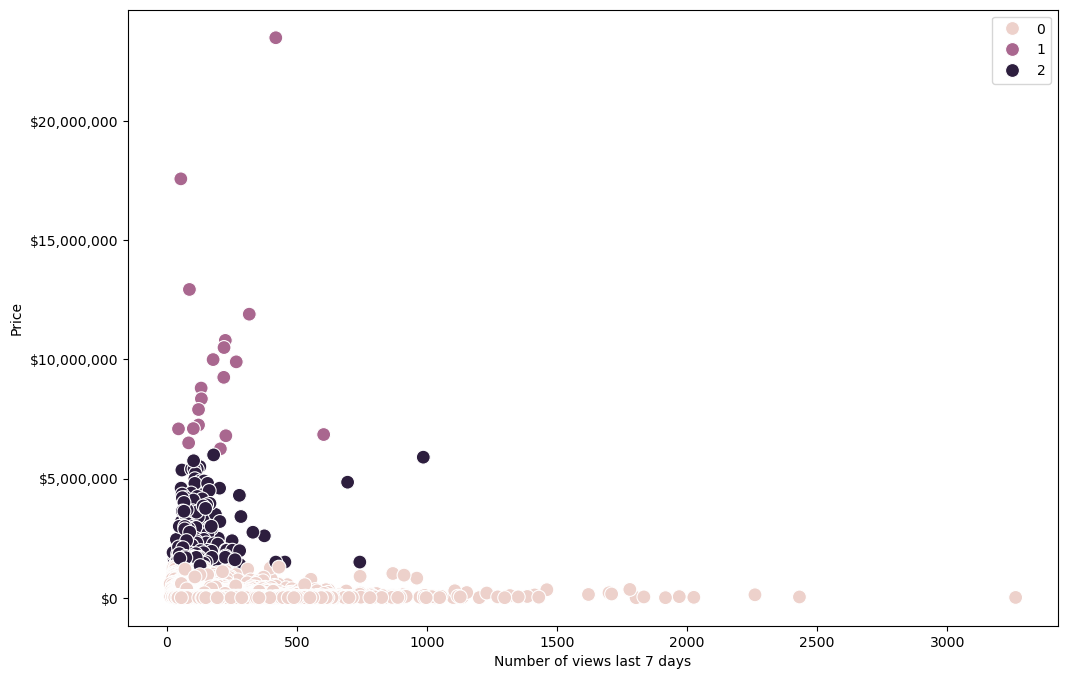

In [183]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Number of views last 7 days'], y=df['Price'], hue=kmeans.labels_, s=100)
# Format the y-axis to show currency
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.grid(False) 
plt.xlabel('Number of views last 7 days') 
plt.ylabel('Price') 
plt.show()

The results of this graph indicate that lower-priced boats tend to attract more views, suggesting higher demand in this price range. Conversely, as boat prices increase, the market appears to shrink, with fewer potential buyers showing interest in higher-priced boats.

In [186]:
df_drop.loc[df_drop['clusters'] == 2, 'cluster'] = 'dark purple'
df_drop.loc[df_drop['clusters'] == 1, 'cluster'] = 'purple'
df_drop.loc[df_drop['clusters'] == 0, 'cluster'] = 'pink'

In [179]:
df_drop.groupby('cluster').agg({'Price':['mean', 'median'], 
                         'Number of views last 7 days':['mean', 'median'], 
                         'Year Built':['mean', 'median']})

Price            Number of views last 7 days         \
                     mean     median                        mean median   
cluster                                                                   
dark purple  2.512123e+06  2050000.0                  122.658768   99.0   
pink         1.743509e+05    85650.0                  159.726953  113.0   
purple       9.960428e+06  8800000.0                  198.000000  178.0   

              Year Built          
                    mean  median  
cluster                           
dark purple  2012.331754  2013.0  
pink         2006.418132  2007.0  
purple       2014.947368  2016.0

These findings offer valuable insights into consumer behavior and market trends, which can guide further analysis. The distinction between high-demand, budget-friendly boats and lower-demand luxury boats can help segment the market, enabling targeted marketing strategies. For lower-priced boats, broad, high-volume marketing may maximize views, while luxury boats may benefit from personalized, niche-focused campaigns.

Price optimization could identify thresholds where interest declines, helping sellers competitively position their boats. Additionally, analyzing other factors—such as boat type, size, or location—can reveal deeper insights into what drives demand in each price range.

These trends also support inventory planning and market forecasting. For example, historical data on price and views can predict future demand, aiding manufacturers and dealers in aligning production with market needs. Furthermore, the correlation between newer models and higher prices highlights an opportunity for innovation in the luxury segment, while identifying key drivers for budget-friendly models can refine affordable designs.

Finally, competitive analysis can assess how pricing and demand vary across markets, providing a strategic edge. By exploring these avenues, stakeholders can better align pricing, marketing, and product development with consumer demand.

In [189]:
df.to_csv(os.path.join(path, '02 Data' , 'Prepared Data' , 'boat_data_assignment_5pt1.csv'))

In [191]:
df_drop.to_csv(os.path.join(path, '02 Data' , 'Prepared Data' , 'boat_data_assignment_5pt2.csv'))